# Sentiment Analysis

## Task 3

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
 
df_emergencyplus_google = pd.read_csv('emergency-plus google.csv')
df_firstaid_google = pd.read_csv('Red-cross-google.csv')
df_emergencyplus_apple = pd.read_csv('emergency-plus-apple.csv')
df_firstaid_apple = pd.read_csv('redcross-apple.csv')
    
def sentimentAnalysis(app_review_df):
    reviews = app_review_df['Review'].values.tolist();
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []

    for sentence in reviews:
        vs = analyzer.polarity_scores(sentence)

        if(vs["compound"] >= 0.05):
            sentiments.append(1) 
        elif(vs["compound"] > -0.05):
            sentiments.append(0)
        elif(vs["compound"] <= -0.05):
            sentiments.append(-1) 

    app_review_df["sentiment"] = sentiments
    
    return app_review_df


df_emergencyplus_google_s = sentimentAnalysis(df_emergencyplus_google)
df_emergencyplus_apple_s = sentimentAnalysis(df_emergencyplus_apple)

df_firstaid_google_s = sentimentAnalysis(df_firstaid_google)
df_firstaid_apple_s = sentimentAnalysis(df_firstaid_apple)

df_emergencyplus_combined_s = pd.concat([df_emergencyplus_google, df_emergencyplus_apple])
df_firstaid_combined_s = pd.concat([df_firstaid_google, df_firstaid_apple])

df_emergencyplus_combined_s.to_csv('emergencyplus_combined_sentiment.csv', encoding='utf-8')
df_firstaid_combined_s.to_csv('firstaid_combined_sentiment.csv', encoding='utf-8')

## Task 4.1 - plotting rating over time

C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_25296\1611856138.py:30: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_25296\1611856138.py:33: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]


   ReleaseDate ReleaseVersion  rating
0   2022-08-07           2.34       4
1   2022-06-26           2.33       4
2   2020-11-30           2.26       4
3   2020-11-23           2.24       3
4   2020-11-10           2.23       3
5   2020-08-18           2.22       2
6   2019-03-20           1.26       4
7   2018-04-08           1.17       4
8   2017-09-30           1.16       3
9   2017-06-14           1.15       5
10  2016-12-07           1.14       3
11  2016-08-08           1.13       4
12  2014-12-07           1.11       4
13  2014-11-25          1.0.4       5
14  2014-02-14          1.0.2       4
15  2013-12-09           1.01       3
16  2013-12-04            1.0       4


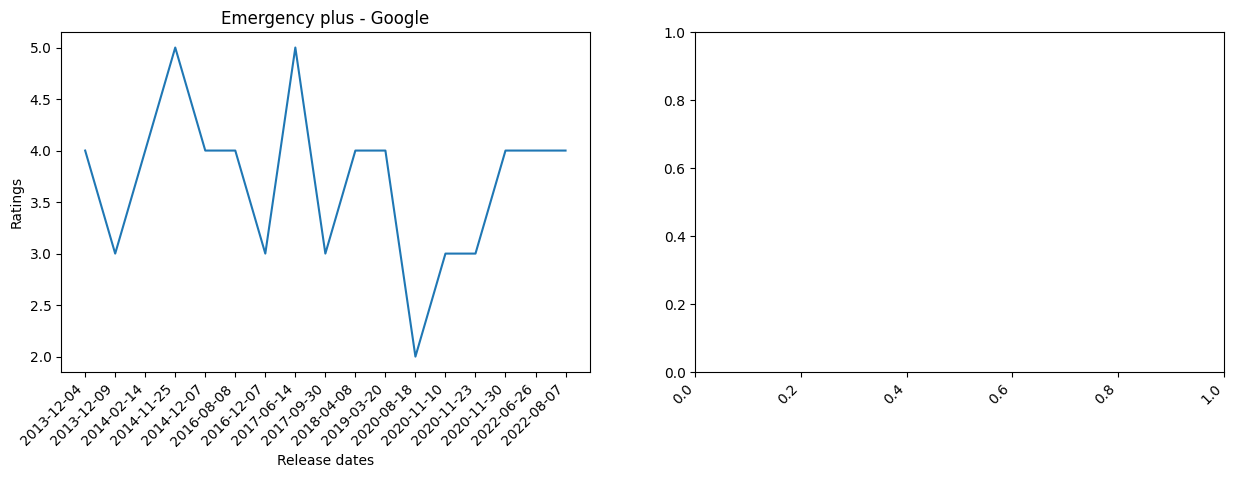

In [6]:
#writing functions - testing II - more improved

import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = pd.read_csv('emergencyplus_version_details_google.csv') 
df_firstaid_google_vesions = pd.read_csv('firstaid_version_details_google.csv')
df_emergencyplus_apple_versions = pd.read_csv('emergencyplus_version_details_apple.csv') 
df_firstaid_apple_vesions = pd.read_csv('firstaid_version_details_apple.csv')

# dates= df_emergencyplus_google_versions['ReleaseDate'] ##jsut the string of dates??
# print(dates)

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df



def averageRatingPerReleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean


fig, ax = plt.subplots(1,2, figsize=(15,5))

def plotRating1(df,rating_list, ax,col, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[col].plot(dates, rating_list[::-1])
    #plt.xticks(rotation = 45)
    ax[col].set_xlabel('Release dates') #for presentation purposes fontsize has increased
    ax[col].set_ylabel(ylabelName)
    #fig.autofmt_xdate()
    fig.autofmt_xdate(rotation=45)
    
    
def plotRating2(df,rating_list, ax, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax.plot(dates, rating_list[::-1])
    ax.set_xlabel('Release dates')
    ax.set_ylabel(ylabelName)
    fig.autofmt_xdate()

rating_list1 = averageRatingPerReleasedate(df_emergencyplus_google_s, df_emergencyplus_google_versions)
ax[0].set_title('Emergency plus - Google')
plotRating1(df_emergencyplus_google_versions, rating_list1,ax, 0, "Ratings")

df_emergencyplus_google_versions['rating'] = rating_list1
print(df_emergencyplus_google_versions)


# rating_list2 = averageOfratingperreleasedate(df_emergencyplus_apple_s, df_emergencyplus_apple_versions)
# ax[1].set_title('Emergency plus - Apple')
# plotRating1(df_emergencyplus_apple_versions,rating_list2,ax, 1 , "Ratings")

# fig1, ax1 = plt.subplots(2, figsize=(20,10))
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

# rating_list3 = averageOfratingperreleasedate(df_firstaid_google_s, df_firstaid_google_vesions)
# ax1[0].set_title('Red cross - Google', fontsize=20)
# plotRating1(df_firstaid_google_vesions,rating_list3, ax1,0, "Ratings")


#rating_list4 = averageOfratingperreleasedate(df_firstaid_apple_s, df_firstaid_apple_vesions)
# ax1[1].set_title('Red cross - Apple', fontsize=20)
# plotRating1(df_firstaid_apple_vesions, rating_list4, ax1,1, "Ratings")

# plt.title('Red cross - Google', fontsize=20)
# dates = df_firstaid_google_vesions['ReleaseDate']
# dates = dates[::-1]
# plt.plot(dates, rating_list3[::-1])
# plt.xticks(rotation = 45)
# plt.xlabel('Release dates')
# plt.ylabel('Ratings')

# plt.title('Red cross - Apple', fontsize=20)
# dates = df_firstaid_apple_vesions['ReleaseDate']
# dates = dates[::-1]
# plt.plot(dates, rating_list4[::-1])
# plt.xticks(rotation = 45)
# plt.xlabel('Release dates')
# plt.ylabel('Ratings')


## Task 4.2 - plotting sentiment over time

   ReleaseDate ReleaseVersion  sentiment
0   2021-11-26         2.12.0         -1
1   2021-08-25         2.11.2          0
2   2021-03-08         2.11.1          0
3   2020-10-26         2.11.0          0
4   2020-07-23         2.10.0          1
5   2020-05-26          2.9.0         -1
6   2020-04-06          2.8.2         -1
7   2020-03-16          2.8.1          0
8   2019-11-18          2.8.0         -1
9   2019-09-05          2.7.3          0
10  2019-07-29          2.7.2         -1
11  2019-07-22          2.7.1          1
12  2019-07-16          2.7.0          0
13  2019-04-30          2.6.2          1
14  2019-03-04          2.6.1          0
15  2018-11-07          2.6.0          1
16  2018-09-04          2.5.1          1
17  2018-03-28          2.5.0          1
18  2017-03-13          2.4.2          1
19  2017-02-08          2.4.1          1
20  2017-01-19            2.4          1
21  2016-01-29          2.3.1          1
22  2016-01-28            2.2          0
23  2015-04-14  

C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_25296\2317744042.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_25296\2317744042.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_25296\2317744042.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_25296\2317744042.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is 

Text(0, 0.5, 'Sentiment')

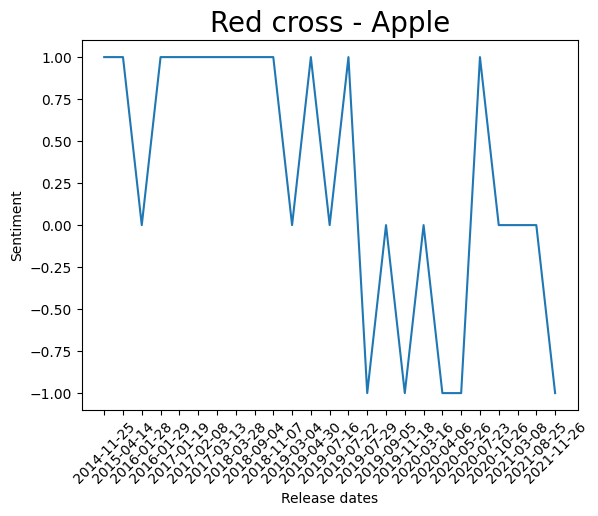

In [5]:
def sentimentPerReleasedate(df,version_df):
    sentiment_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
        else:
            df_new = df[dates[i]:dates[i-1]]
        
        sentiment_list.append(getFrequentSentiment(df_new))

    return sentiment_list

def getFrequentSentiment(df):
    sentiment = 0
    if(df.empty): #when particular range contains no values
        sentiment = 0 #assumption that average rating will be neural
    else:
        sentiment = df['sentiment'].mode()[0]

    return sentiment

# fig, ax = plt.subplots(1,2, figsize=(15,5))
# sentiment_list1 = sentimentperreleasedate(df_emergencyplus_google_s, df_emergencyplus_google_versions)
# print(sentiment_list1)
# ax[0].set_title('Emergency plus - Google')
# plotRating1(df_emergencyplus_google_versions, sentiment_list1,ax, 0, "Sentiment")

# sentiment_list2 = sentimentperreleasedate(df_emergencyplus_apple_s, df_emergencyplus_apple_versions)
# ax[1].set_title('Emergency plus - Apple')
# plotRating1(df_emergencyplus_apple_versions,sentiment_list2,ax, 1, "Sentiment")

# fig1, ax1 = plt.subplots(2, figsize=(20,10))
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

# sentiment_list3 = sentimentperreleasedate(df_firstaid_google_s, df_firstaid_google_vesions)
# ax1[0].set_title('Red cross - Google')
# plotRating1(df_firstaid_google_vesions,sentiment_list3, ax1,0, "Sentiment")

sentiment_list4 = sentimentPerReleasedate(df_firstaid_apple_s, df_firstaid_apple_vesions)
# ax1[1].set_title('Red cross - Apple')
# plotRating1(df_firstaid_apple_vesions, sentiment_list4, ax1,1, "Sentiment")

# plt.title('Red cross - Google', fontsize=20)
# dates = df_firstaid_google_vesions['ReleaseDate']
# dates = dates[::-1]
# plt.plot(dates, sentiment_list3[::-1])
# plt.xticks(rotation = 45)
# plt.xlabel('Release dates')
# plt.ylabel('Sentiment')

df_firstaid_apple_vesions['sentiment'] = sentiment_list4
print(df_firstaid_apple_vesions)

plt.title('Red cross - Apple', fontsize=20)
dates = df_firstaid_apple_vesions['ReleaseDate']
dates = dates[::-1]
plt.plot(dates, sentiment_list4[::-1])
plt.xticks(rotation = 45)
plt.xlabel('Release dates')
plt.ylabel('Sentiment')

